## EXPLORATORY DATA ANALYSIS 

We will explore the dataset to understand the data and to see what we can deduce from it.

This database contains 14 attributes, The "target" column is our dependent variable 

### Discription of the data attribute 
1. **age:** age in years
2. **sex:** sex (1 = male; 0 = female)
3. cp: chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4:    asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital) trestbps
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest 
11. slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopyca
13. thal: 3 = normal; 6 = fixed defect 
14. **target** - diagnosis of heart disease (angiographic disease status) -- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing (in any major vessel: attributes 

## Objective 
+ We want to see the distribution male and females with heart disease 
+ We want to see the distribution of people with heart disease with respect to their age
+ Use different machine learning model to predict the if a patient has heart disease or not



In [47]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#import dataset
heart_disease_data = pd.read_csv('heart.csv')
heart_disease_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [48]:
heart_disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [49]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [50]:
heart_disease_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

## Comment
From the result above we can note that we have 
+ **165 patients with heart disease**
+ **138 patients without heart disaese**

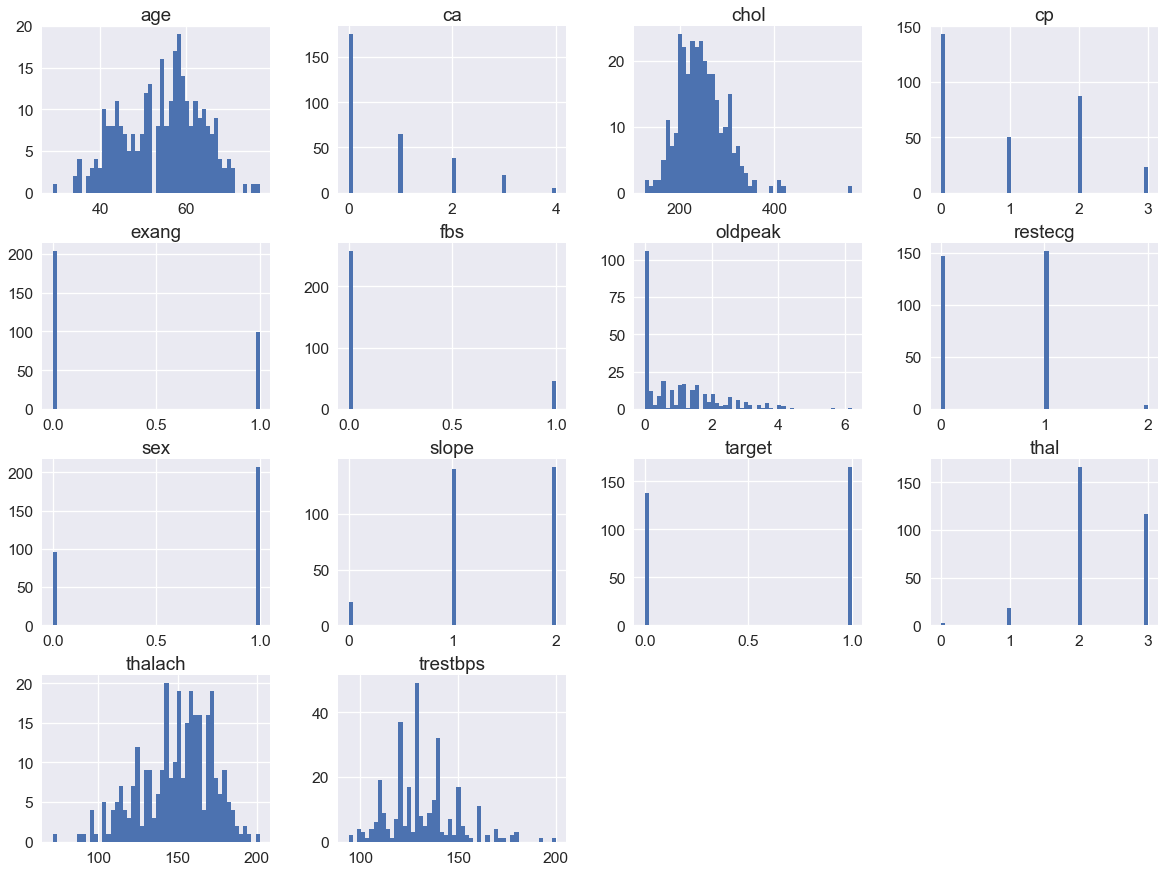

In [51]:
%matplotlib inline
heart_disease_data.hist(bins=50, figsize=(20,15))
plt.show()

In [52]:

#Looking for possible correlation patterns in the datasets
corr_matrix = heart_disease_data.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [53]:
heart_disease_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

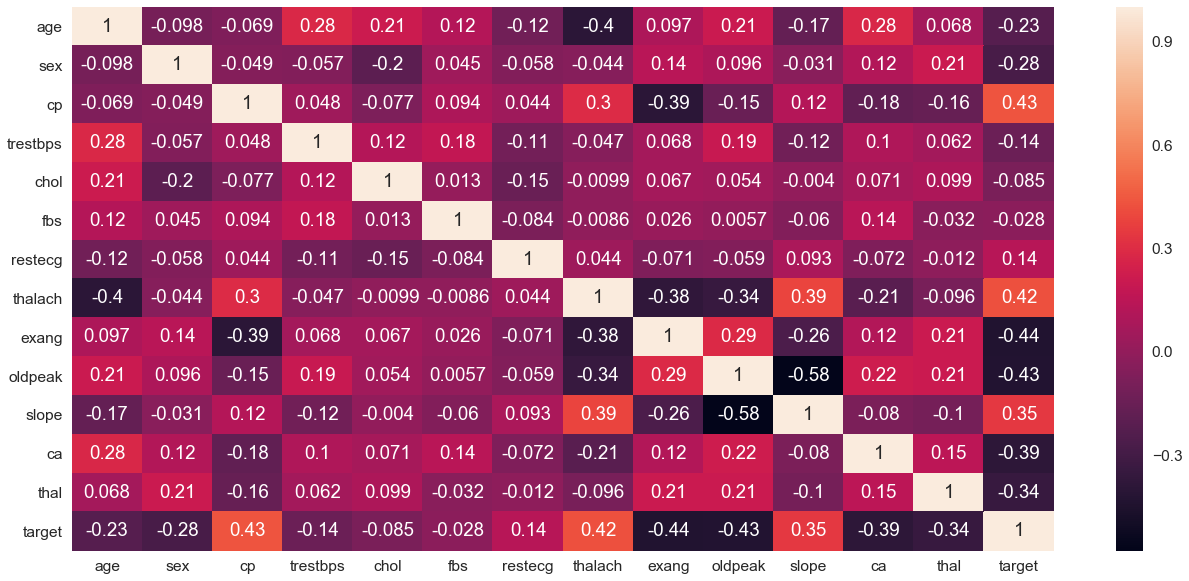

In [54]:

sns.set(rc={'figure.figsize':(22,10)})
sns.set_context("talk", font_scale=1.2)
sns.heatmap(
    heart_disease_data.loc[:, ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']].corr(),
    annot=True
)

Text(0,0.5,'Frequency')

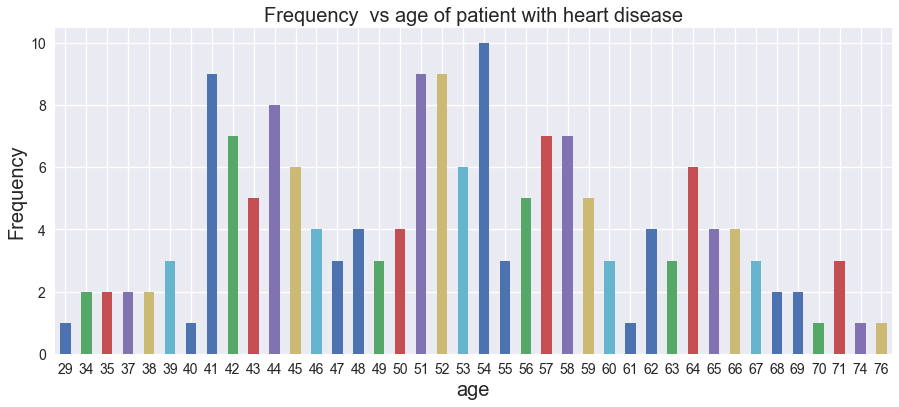

In [55]:
#Plot the frequency of patients with heart disease
ax = heart_disease_data[heart_disease_data['target'] == 1]['age'].value_counts().sort_index().plot.bar(
    figsize=(15, 6),
    fontsize= 14,
    title="Frequency  vs age of patient with heart disease",
    rot=0)
ax.set_title("Frequency  vs age of patient with heart disease", fontsize=20)
ax.set_xlabel("age", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)

Text(0,0.5,'Percentage')

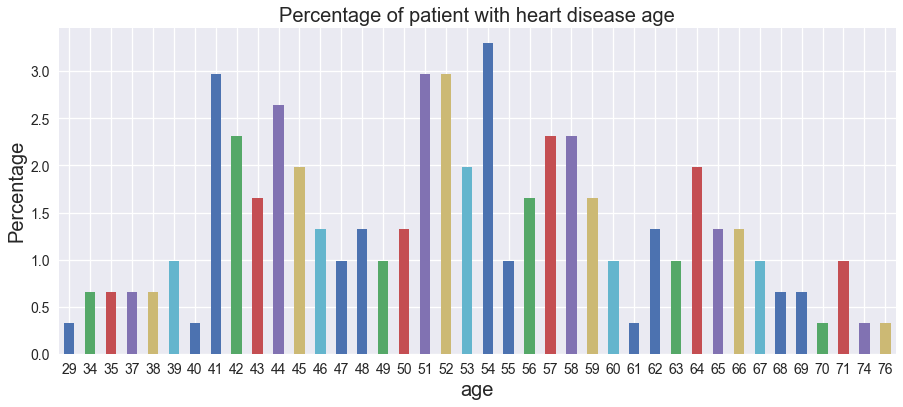

In [56]:
#Plot the bar chart of the percentage of patient with heart disease
ax = ((heart_disease_data[heart_disease_data['target'] == 1]['age'].value_counts() / len(heart_disease_data)) * 100).sort_index().plot.bar(
    figsize=(15, 6),
    fontsize= 14,
    title="Percentage  vs age of patient with heart disease",
    rot=0)
ax.set_title("Percentage of patient with heart disease age", fontsize=20)
ax.set_xlabel("age", fontsize=20)
ax.set_ylabel("Percentage", fontsize=20)

### Comment 
From the diagrams above we can see that age of 40 - 60 we have high percentage / number of people with heart disease 

Text(0,0.5,'frequency')

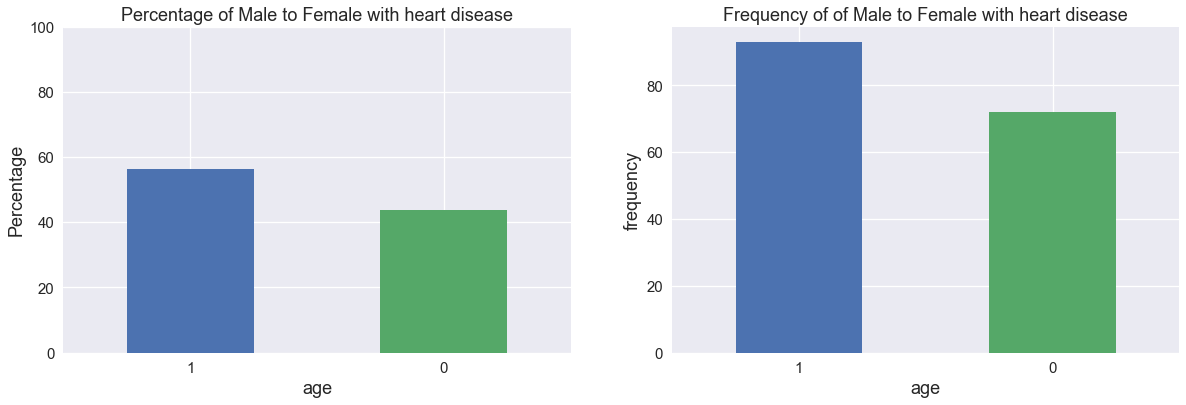

In [57]:
#Plot the precentage of male to female with heart disease
fig, axarr = plt.subplots(1, 2, figsize=(20, 6))

((heart_disease_data[heart_disease_data['target'] == 1]['sex'].value_counts() / len(heart_disease_data[heart_disease_data['target'] == 1])) * 100).plot.bar(
    rot = 0,
    fontsize= 15,
    title='Percentage of Male to Female',
    ax=axarr[0])
axarr[0].set_title('Percentage of Male to Female with heart disease', fontsize=18)
axarr[0].set_xlabel("age", fontsize=18)
axarr[0].set_ylabel("Percentage", fontsize=18)
axarr[0].set_ylim([0,100])

#Plot the frequency of Male to Female with heart disease
heart_disease_data[heart_disease_data['target'] == 1]['sex'].value_counts().plot.bar(
    rot=0, 
    fontsize= 15,
    title='Frequency of Male to Female with heart disease',
    ax=axarr[1])
axarr[1].set_title('Frequency of of Male to Female with heart disease', fontsize=18)
axarr[1].set_xlabel("age", fontsize=18)
axarr[1].set_ylabel("frequency", fontsize=18)


### Comment
**Please note**
+ **1 - Male**
+ **0 - Female **

Thses graphs show that more males have heart disease then females

# Machine Learning Model 

## Data preprocessing 

In [58]:
heart_disease_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Comment 
we need to encode some colmns in the table for example in the CP column a patient with cp(chest pain type) of  1 (typical angina) is not less than a patient with 2(atypical angina). They are catergorical data so we need to encode them

### Encoding Catergorical data

we will use the One-Hot_Encoding approach to solve the issue with the categorical data 

In [59]:
#divide the data to target and features
X = heart_disease_data.drop(['target'], axis=1)
y = heart_disease_data.target

#Encode the catergorical data in the features data
X_encoded = pd.get_dummies(heart_disease_data, columns=['sex', 'cp','fbs','restecg','exang','slope','ca','thal'])
X_encoded.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


### Splitting the data 

We need to split the data to train set and test set. Each set will have the features and the target. 
The feature will be every column in the dataset expect the target column


In [60]:
#splitting thr dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state = 1)

### Feature scaling 
We feature scale the feature data because some of the columns in our data have higher scale than some other columns. For instance thalach column is in 100s while some other columns like oldpeak are in their 10s 

In [61]:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Logistic Regression Model

In [62]:
#Cretae Logistic regression model and train the model
from sklearn.linear_model import LogisticRegression
log_Reg = LogisticRegression(random_state = 1)
log_Reg.fit(X_train,y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
#Predict  the test data 
y_pred_log_Reg = log_Reg.predict(X_test)

In [64]:
#checking the performance of the model
y_pred_log_Reg_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_log_Reg })
y_pred_log_Reg_df.head(10)

,Expected,Predicted
204,0,0
159,1,1
219,0,0
174,0,0
184,0,0
295,0,0
269,0,0
119,1,1
193,0,0
154,1,1


In [65]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
log_Reg_cm = confusion_matrix(y_test, y_pred_log_Reg)
log_Reg_cm

array([[30,  0],
       [ 0, 31]])

In [66]:
#Calculate the accuracy of logistic regression model
log_Reg_acc = accuracy_score(y_test, y_pred_log_Reg) 
log_Reg_acc

1.0

## K-NN Model 

In [67]:
#Cretae KNN model and train the model
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors = 5, metric='minkowski',p=2)
kNN.fit(X_train,y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [68]:
#Predict  the test data 
y_pred_kNN = kNN.predict(X_test)

In [69]:
#checking the performance of the KNN model
y_pred_KNN_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_kNN })
y_pred_KNN_df.head(10)

,Expected,Predicted
204,0,0
159,1,1
219,0,0
174,0,0
184,0,0
295,0,0
269,0,0
119,1,1
193,0,0
154,1,1


In [70]:
# Making the Confusion Matrix
KNN_cm = confusion_matrix(y_test, y_pred_kNN)
KNN_cm

array([[26,  4],
       [ 3, 28]])

In [71]:
#Calculate the accuracy of KNN model
KNN_acc = accuracy_score(y_test, y_pred_kNN) 
KNN_acc

0.8852459016393442

## SVM - Support Vector Machine 

In [72]:
#Cretae SVM model and train the model
from sklearn.svm import SVC 
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train,y_train )

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
#Predict  the test data 
y_pred_svc = svc.predict(X_test)

In [74]:
#checking the performance of the model
y_pred_svc_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_svc })
y_pred_svc_df.head(10)

,Expected,Predicted
204,0,0
159,1,1
219,0,0
174,0,0
184,0,0
295,0,0
269,0,0
119,1,1
193,0,0
154,1,1


In [75]:
# Making the Confusion Matrix
svc_cm = confusion_matrix(y_test, y_pred_svc)
svc_cm

array([[30,  0],
       [ 0, 31]])

In [76]:
#Calculate the accuracy of SVC model
svc_acc = accuracy_score(y_test, y_pred_svc) 
svc_acc

1.0

## Naive Bayes

In [77]:
#Cretae SVM model and train the model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train )

GaussianNB(priors=None)

In [78]:
#Predict  the test data 
y_pred_nb = nb.predict(X_test)

In [79]:
#checking the performance of the model
y_pred_nb_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_nb})
y_pred_nb_df.head(10)

,Expected,Predicted
204,0,0
159,1,1
219,0,0
174,0,0
184,0,0
295,0,0
269,0,0
119,1,1
193,0,0
154,1,1


In [80]:
# Making the Confusion Matrix
nb_cm = confusion_matrix(y_test, y_pred_nb)
nb_cm

array([[30,  0],
       [ 0, 31]])

In [81]:
#Calculate the accuracy of Naive bayes model
nb_acc = accuracy_score(y_test, y_pred_nb) 
nb_acc

1.0

## Decision Tree Classification

In [82]:
#Cretae Decision Tree Classification model and train the model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [83]:
#Predict  the test data 
y_pred_dtc = dtc.predict(X_test)

In [84]:
#checking the performance of the model
y_pred_dtc_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_dtc})
y_pred_dtc_df.head(10)

,Expected,Predicted
204,0,0
159,1,1
219,0,0
174,0,0
184,0,0
295,0,0
269,0,0
119,1,1
193,0,0
154,1,1


In [85]:
# Making the Confusion Matrix
dtc_cm = confusion_matrix(y_test, y_pred_dtc)
dtc_cm

array([[30,  0],
       [ 0, 31]])

In [86]:
#Calculate the accuracy of Decision Tree Classification model
dtc_acc = accuracy_score(y_test, y_pred_dtc) 
dtc_acc

1.0

## Random Forest Classification

In [87]:
#Cretae Random Forest Classification model and train the model
rom sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train,y_train )


SyntaxError: invalid syntax (<ipython-input-87-c946a836a5ca>, line 2)

In [ ]:
#Predict  the test data 
y_pred_rfc = rfc.predict(X_test)

In [ ]:
#checking the performance of the model
y_pred_rfc_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_rfc})
y_pred_rfc_df.head(10)

In [ ]:
# Making the Confusion Matrix
rfc_cm = confusion_matrix(y_test, y_pred_rfc)
rfc_cm

In [ ]:
#Calculate the accuracy of Random Forest Classification model
fc_acc = accuracy_score(y_test, y_pred_dtc) 
rfc_acc

## Conclusion
| Model                           | accuracy   |
|---------------------------------|------------|
|  Logistic Regression            | 100%       |
|---------------------------------|------------|
|  K-NN                           | 88.5%      |
|---------------------------------|------------|
|   Support Vector Machine        | 100%       |
|---------------------------------|------------|
|  Naive Bayes                    | 100%       |
|---------------------------------|------------|
|  Decision Tree Classification   | 100%       |
|---------------------------------|------------|
|  Random Forest Classification   | 100%       |
|---------------------------------|------------|
